In [ ]:
# unzip data
!unzip motion_data.zip

Archive:  motion_data.zip
   creating: motion_data/
   creating: motion_data/move_circle/
  inflating: motion_data/move_circle/move_circle_1748599446.npy  
  inflating: motion_data/move_circle/move_circle_1748599449.npy  
  inflating: motion_data/move_circle/move_circle_1748599452.npy  
  inflating: motion_data/move_circle/move_circle_1748599455.npy  
  inflating: motion_data/move_circle/move_circle_1748599458.npy  
  inflating: motion_data/move_circle/move_circle_1748599461.npy  
  inflating: motion_data/move_circle/move_circle_1748599464.npy  
  inflating: motion_data/move_circle/move_circle_1748599467.npy  
  inflating: motion_data/move_circle/move_circle_1748599470.npy  
  inflating: motion_data/move_circle/move_circle_1748599473.npy  
  inflating: motion_data/move_circle/move_circle_1748599476.npy  
  inflating: motion_data/move_circle/move_circle_1748599479.npy  
  inflating: motion_data/move_circle/move_circle_1748599482.npy  
  inflating: motion_data/move_circle/move_circle_174

In [ ]:
import os
import numpy as np

data = []
labels = []

for label_index, label_name in enumerate(os.listdir("motion_data")):
    label_path = f"motion_data/{label_name}"
    if not os.path.isdir(label_path):
        continue  # Skip if not a directory

    for file in os.listdir(label_path):
        file_path = os.path.join(label_path, file)
        if file.endswith(".npy") and os.path.getsize(file_path) > 0:
            try:
                sample = np.load(file_path)
                sample = sample.flatten()  # Shape: (300,)
                data.append(sample)
                labels.append(label_index)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
        else:
            print(f"Skipped empty or invalid file: {file_path}")


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load data
data = []
labels = []
label_map = {"move_none": 0, "move_circle": 1, "move_shake": 2, "move_twist": 3}

for label_name in os.listdir("motion_data"):
    for file in os.listdir(f"motion_data/{label_name}"):
        if file.endswith(".npy"):
            sample = np.load(f"motion_data/{label_name}/{file}")
            sample = sample.flatten()  # Shape: (300,)
            data.append(sample)
            labels.append(label_map[label_name])

X = np.array(data)
y = tf.keras.utils.to_categorical(labels, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fully connected model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1, epochs=15)

Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5788 - loss: 0.9671 - val_accuracy: 0.9583 - val_loss: 0.3023
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0810 - val_accuracy: 0.9792 - val_loss: 0.1220
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 0.9792 - val_loss: 0.0799
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9792 - val_loss: 0.0803
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9792 - val_loss: 0.0798
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9792 - val_loss: 0.0723
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9792 - val_loss: 0.0754
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.

In [ ]:
# Convert Model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("motion_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp2ecb9oua'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136868726986256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136868726987408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136868726985680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136868726983952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136868726987984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136868726984144: TensorSpec(shape=(), dtype=tf.resource, name=None)


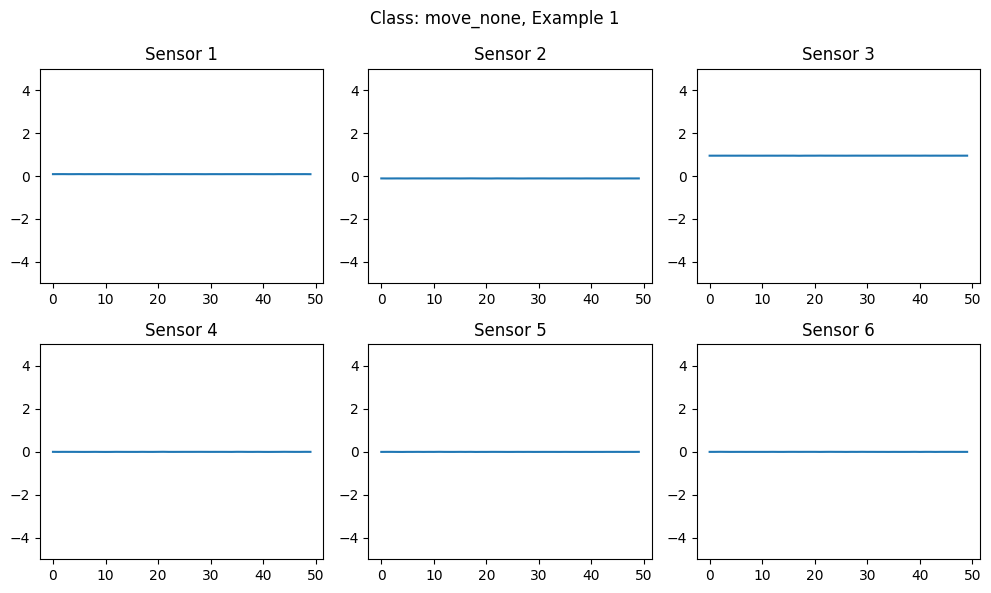

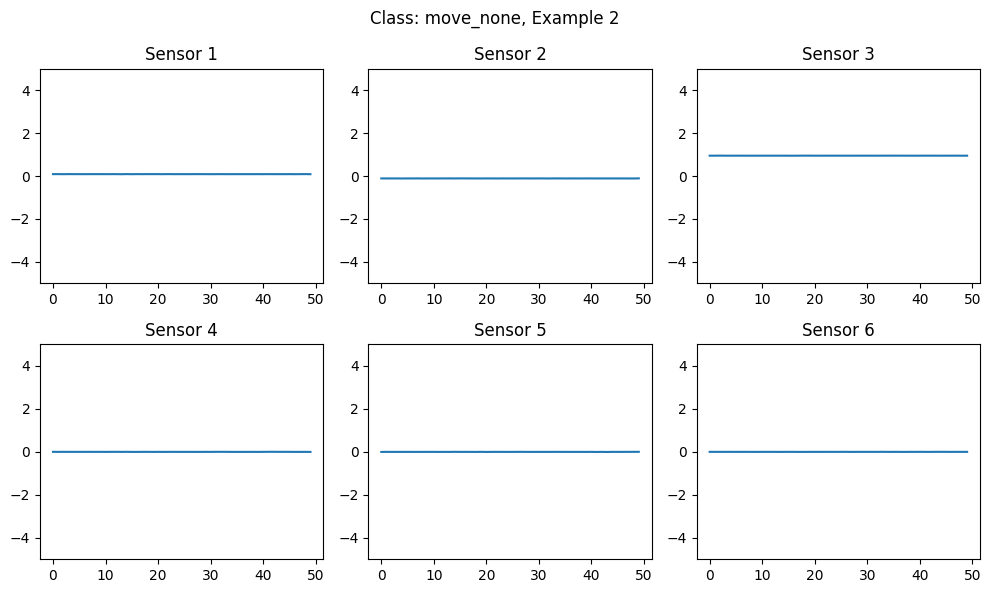

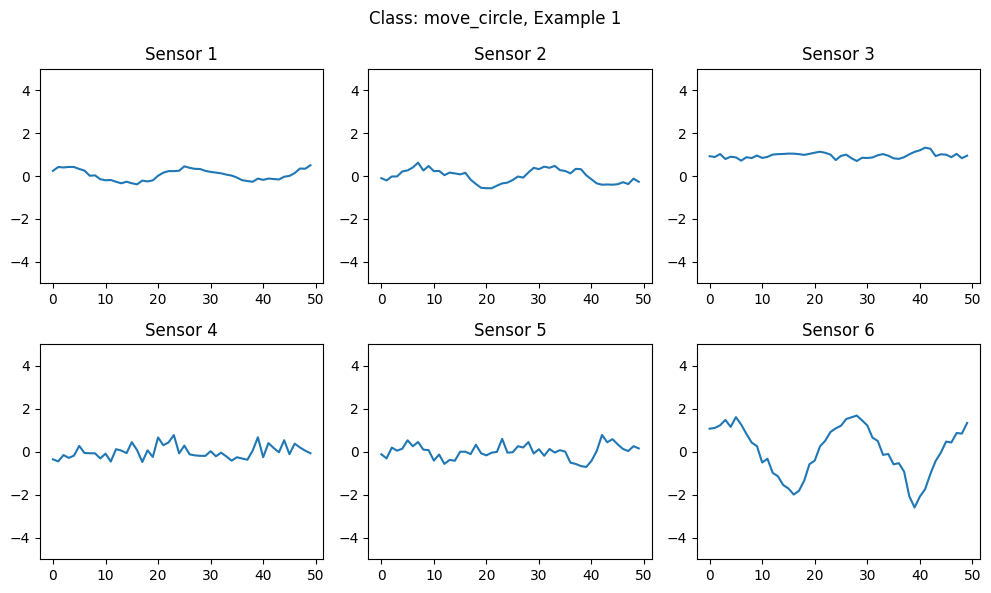

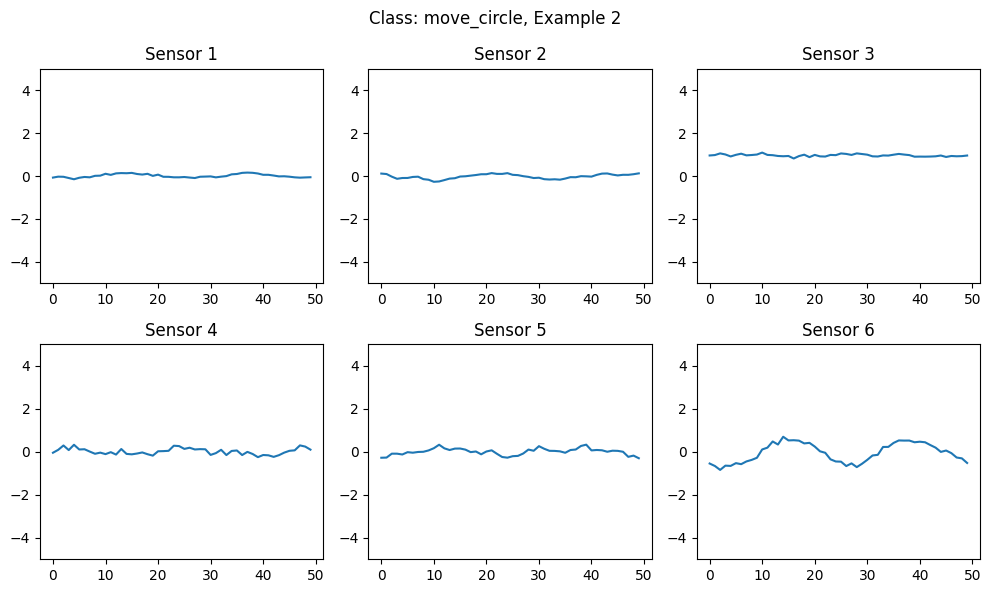

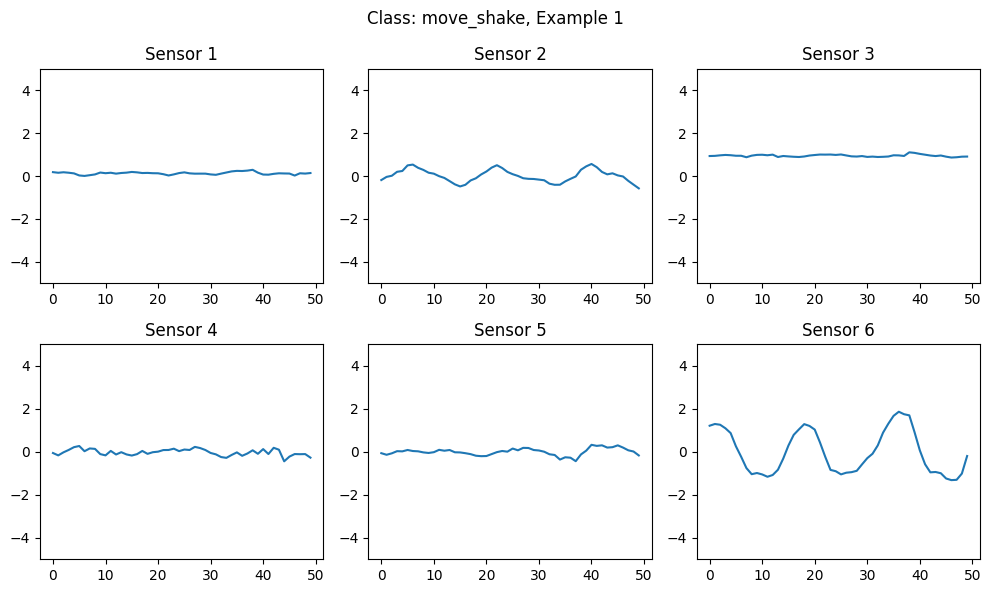

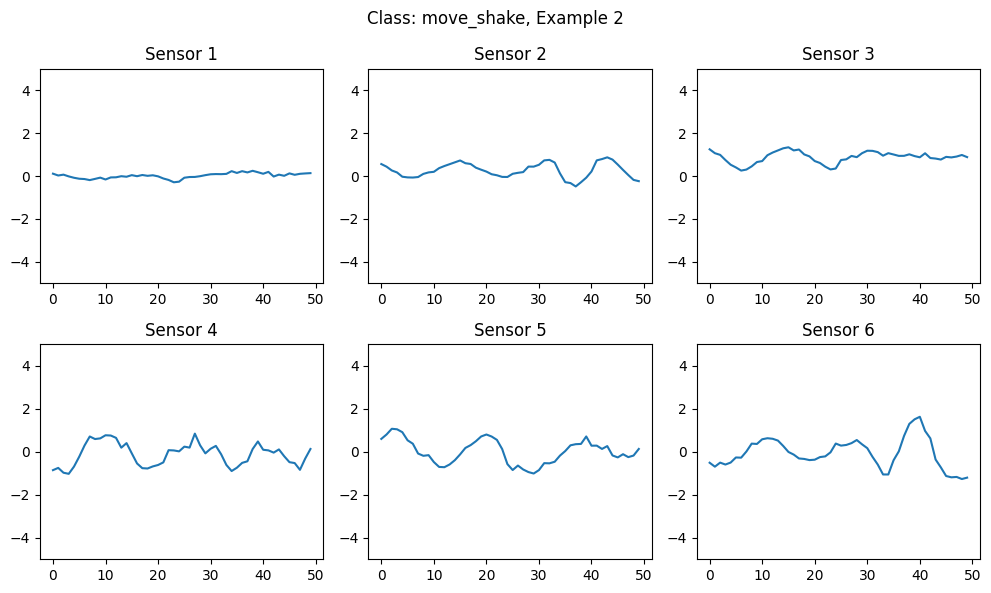

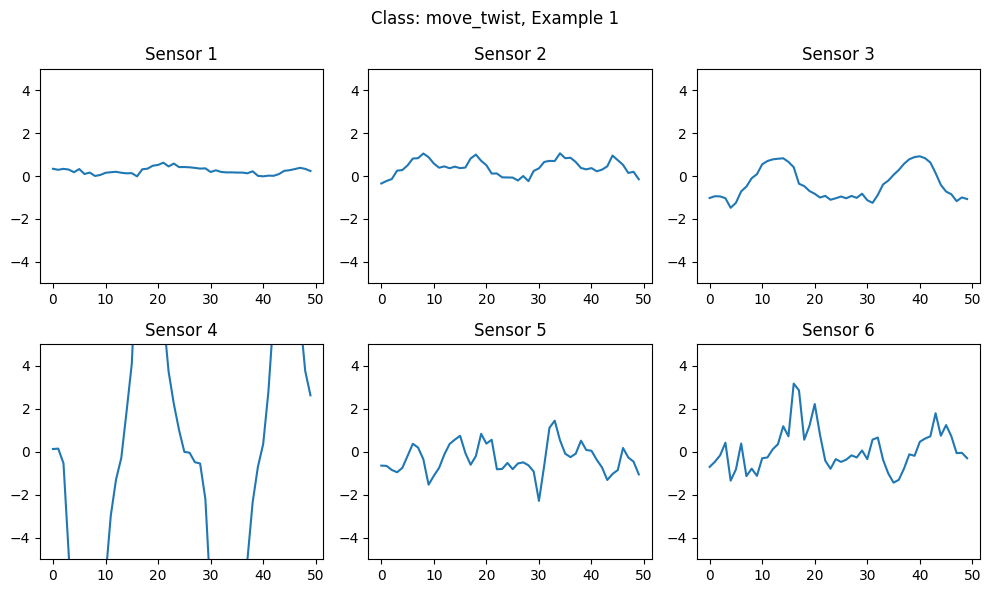

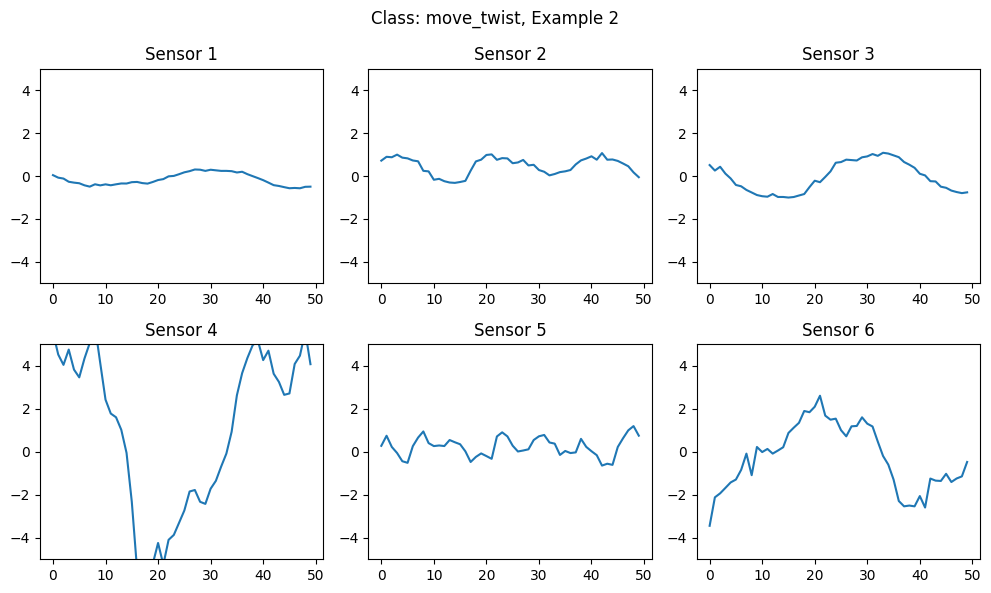

In [ ]:
import matplotlib.pyplot as plt

num_examples_per_class = 2  # Number of examples to plot per class
y_min = -5
y_max = 5

label_map_inv = {0: "move_none", 1: "move_circle", 2: "move_shake", 3: "move_twist"}

for label in range(4):
    class_files = [f for f in os.listdir(f"motion_data/{label_map_inv[label]}") if f.endswith(".npy")]
    for i in range(min(num_examples_per_class, len(class_files))):
        file_path = f"motion_data/{label_map_inv[label]}/{class_files[i]}"
        sample = np.load(file_path)

        plt.figure(figsize=(10, 6))
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.plot(sample[:, j])
            plt.ylim(y_min, y_max)  # Set y-axis limits
            plt.title(f"Sensor {j+1}")
        plt.suptitle(f"Class: {label_map_inv[label]}, Example {i+1}")
        plt.tight_layout()
        plt.show()
